# Intelligent Agents: Reflex-Based Agents for the Vacuum-cleaner World

Student Name: Derek Delahoussaye

I have used the following AI tools: [ChatGPT, Perplexity, Cursor]

I understand that my submission needs to be my own work: DD

## Instructions

Total Points: Undergrads 100 + 5 bonus / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a HTML file.

### Using Visual Studio Code

If you use VS code then you can use `Export` (click on `...` in the menu bar) to save your notebook as a HTML file. Note that you have to run all blocks before so the HTML file contains your output.

### Using Google Colab

In Colab you need to save the notebook on GoogleDrive to work with it. For this you need to mount your google dive and change to the correct directory by uncommenting the following lines and running the code block.

In [ ]:
# from google.colab import drive
# import os
#
# drive.mount('/content/drive')
# os.chdir('/content/drive/My Drive/Colab Notebooks/')

Once you are done with the assignment and have run all code blocks using `Runtime/Run all`, you can convert the file on your GoogleDrive into HTML be uncommenting the following line and running the block.

In [ ]:
# !jupyter nbconvert --to html Copy\ of\ robot_vacuum.ipynb

You may have to fix the file location or the file name to match how it looks on your GoogleDrive. You can navigate in Colab to your GoogleDrive using the little folder symbol in the navigation bar to the left.

## Introduction

In this assignment you will implement a simulator environment for an automatic vacuum cleaner robot, a set of different reflex-based agent programs, and perform a comparison study for cleaning a single room. Focus on the __cleaning phase__ which starts when the robot is activated and ends when the last dirty square in the room has been cleaned. Someone else will take care of the agent program needed to navigate back to the charging station after the room is clean.

## PEAS description of the cleaning phase

__Performance Measure:__ Each action costs 1 energy unit. The performance is measured as the sum of the energy units used to clean the whole room.

__Environment:__ A room with $n \times n$ squares where $n = 5$. Dirt is randomly placed on each square with probability $p = 0.2$. For simplicity, you can assume that the agent knows the size and the layout of the room (i.e., it knows $n$). To start, the agent is placed on a random square.

__Actuators:__ The agent can clean the current square (action `suck`) or move to an adjacent square by going `north`, `east`, `south`, or `west`.

__Sensors:__ Four bumper sensors, one for north, east, south, and west; a dirt sensor reporting dirt in the current square.  


## The agent program for a simple randomized agent

The agent program is a function that gets sensor information (the current percepts) as the arguments. The arguments are:

* A dictionary with boolean entries for the for bumper sensors `north`, `east`, `west`, `south`. E.g., if the agent is on the north-west corner, `bumpers` will be `{"north" : True, "east" : False, "south" : False, "west" : True}`.
* The dirt sensor produces a boolean.

The agent returns the chosen action as a string.

Here is an example implementation for the agent program of a simple randomized agent:  

In [2]:
# make sure numpy is installed
!pip install -q numpy

In [3]:
import numpy as np

actions = ["north", "east", "west", "south", "suck"]

def simple_randomized_agent(bumpers, dirty):
    return np.random.choice(actions)

In [4]:
# define percepts (current location is NW corner and it is dirty)
bumpers = {"north" : True, "east" : False, "south" : False, "west" : True}
dirty = True

# call agent program function with percepts and it returns an action
simple_randomized_agent(bumpers, dirty)

'suck'

__Note:__ This is not a rational intelligent agent. It ignores its sensors and may bump into a wall repeatedly or not clean a dirty square. You will be asked to implement rational agents below.

## Simple environment example

We implement a simple simulation environment that supplies the agent with its percepts.
The simple environment is infinite in size (bumpers are always `False`) and every square is always dirty, even if the agent cleans it. The environment function returns a different performance measure than the one specified in the PEAS description! Since the room is infinite and all squares are constantly dirty, the agent can never clean the whole room. Your implementation needs to implement the **correct performance measure.** The energy budget of the agent is specified as `max_steps`.

In [5]:
def simple_environment(agent_function, max_steps, verbose = True):
    num_cleaned = 0

    for i in range(max_steps):
        dirty = True
        bumpers = {"north" : False, "south" : False, "west" : False, "east" : False}

        action = agent_function(bumpers, dirty)
        if (verbose): print("step", i , "- action:", action)

        if (action == "suck"):
            num_cleaned = num_cleaned + 1

    return num_cleaned



Do one simulation run with a simple randomized agent that has enough energy for 20 steps.

In [6]:
simple_environment(simple_randomized_agent, max_steps = 20)

step 0 - action: suck
step 1 - action: suck
step 2 - action: east
step 3 - action: suck
step 4 - action: north
step 5 - action: west
step 6 - action: suck
step 7 - action: north
step 8 - action: west
step 9 - action: south
step 10 - action: south
step 11 - action: east
step 12 - action: south
step 13 - action: west
step 14 - action: west
step 15 - action: east
step 16 - action: south
step 17 - action: south
step 18 - action: south
step 19 - action: west


4

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook.
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement intelligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formatted professionally.
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your submitted file is readable and contains all figures.
4. Document your code. Use comments in the code and add a discussion of how your implementation works and your design choices.


## Task 1: Implement a simulation environment [20 Points]

The simple environment above is not very realistic. Your environment simulator needs to follow the PEAS description from above. It needs to:

* Initialize the environment by storing the state of each square (clean/dirty) and making some dirty. ([Help with random numbers and arrays in Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/random_numbers_and_arrays.ipynb))
* Keep track of the agent's position.
* Call the agent function repeatedly and provide the agent function with the sensor inputs.  
* React to the agent's actions. E.g, by removing dirt from a square or moving the agent around unless there is a wall in the way.
* Keep track of the performance measure. That is, track the agent's actions until all dirty squares are clean and count the number of actions it takes the agent to complete the task.

The easiest implementation for the environment is to hold an 2-dimensional array to represent if squares are clean or dirty and to call the agent function in a loop until all squares are clean or a predefined number of steps have been reached (i.e., the robot runs out of energy).

The simulation environment should be a function like the `simple_environment()` and needs to work with the simple randomized agent program from above. **Use the same environment for all your agent implementations in the tasks below.**

*Note on debugging:* Debugging is difficult. Make sure your environment prints enough information when you use `verbose = True`. Also, implementing a function that the environment can use to displays the room with dirt and the current position of the robot at every step is very useful.  

In [36]:
import random
import numpy as np
import matplotlib.pyplot as plt

def create_environment(n, dirt_prob):
    """Initialize an n x n grid with a given probability of dirty squares."""
    environment = [[False for _ in range(n)] for _ in range(n)]
    num_dirty_squares = int(n * n * dirt_prob)
    dirty_count = 0

    for y in range(n):
        for x in range(n):
            if dirty_count < num_dirty_squares and random.random() < dirt_prob:
                environment[y][x] = True
                dirty_count += 1
    return environment

def get_bumpers(x, y, n):
    """Return a dictionary indicating which borders the agent is touching.

    Since (0,0) is the top-left:
      - 'north' is when y == 0,
      - 'south' is when y == n - 1,
      - 'west'  is when x == 0,
      - 'east'  is when x == n - 1.
    """
    return {
        "north": y == 0,
        "south": y == n - 1,
        "west":  x == 0,
        "east":  x == n - 1
    }

def display_environment(environment, agent_pos):
    """Print the grid with agent and dirt locations."""
    n = len(environment)
    for y in range(n):
        row_str = ""
        for x in range(n):
            if (x, y) == agent_pos:
                row_str += "A "  # Agent's position
            elif environment[y][x]:
                row_str += "D "  # Dirty cell
            else:
                row_str += "C "  # Clean cell
        print(row_str)
    print()

def vacuum_environment(agent_function, n=5, dirt_prob=0.2, max_steps=100, verbose=True):
    global position
    environment = create_environment(n, dirt_prob)
    total_dirt = sum(1 for row in environment for cell in row if cell)

    x = random.randint(0, n - 1)
    y = random.randint(0, n - 1)
    position = (x, y)
    steps = 0

    if verbose:
        print("Initial Environment:")
        display_environment(environment, position)

    while total_dirt > 0 and steps < max_steps:
        bumpers = get_bumpers(x, y, n)
        action = agent_function(bumpers, environment[y][x])
        if verbose:
            print(f"Step {steps}: Position ({x}, {y}), Action: {action}")

        if action == "suck" and environment[y][x]:
            environment[y][x] = False
            total_dirt -= 1
        elif action == "north" and not bumpers["north"]:
            y -= 1  # Moving north decrements y
        elif action == "south" and not bumpers["south"]:
            y += 1  # Moving south increments y
        elif action == "west" and not bumpers["west"]:
            x -= 1  # Moving west decrements x
        elif action == "east" and not bumpers["east"]:
            x += 1  # Moving east increments x

        position = (x, y)

        steps += 1
        if verbose:
            display_environment(environment, position)

    if verbose:
        print("Final Environment:")
        display_environment(environment, position)
        print(f"Total steps taken: {steps}")
        print(f"Total dirt remaining: {total_dirt}")

    return steps, total_dirt



In [37]:
vacuum_environment(simple_randomized_agent, n=5, dirt_prob=0.2, max_steps=1000, verbose=True)

Streaming output truncated to the last 5000 lines.
Step 4: Position (0, 4), Action: south
C C C C D 
D C C D C 
C C C C C 
C C D C C 
A C C C C 

Step 5: Position (0, 4), Action: east
C C C C D 
D C C D C 
C C C C C 
C C D C C 
C A C C C 

Step 6: Position (1, 4), Action: north
C C C C D 
D C C D C 
C C C C C 
C A D C C 
C C C C C 

Step 7: Position (1, 3), Action: east
C C C C D 
D C C D C 
C C C C C 
C C A C C 
C C C C C 

Step 8: Position (2, 3), Action: south
C C C C D 
D C C D C 
C C C C C 
C C D C C 
C C A C C 

Step 9: Position (2, 4), Action: north
C C C C D 
D C C D C 
C C C C C 
C C A C C 
C C C C C 

Step 10: Position (2, 3), Action: east
C C C C D 
D C C D C 
C C C C C 
C C D A C 
C C C C C 

Step 11: Position (3, 3), Action: west
C C C C D 
D C C D C 
C C C C C 
C C A C C 
C C C C C 

Step 12: Position (2, 3), Action: east
C C C C D 
D C C D C 
C C C C C 
C C D A C 
C C C C C 

Step 13: Position (3, 3), Action: east
C C C C D 
D C C D C 
C C C C C 
C C D C A 
C C C C C 

S

(717, 0)

Show that your environment works with the simple randomized agent from above.

## Task 2:  Implement a simple reflex agent [10 Points]

The simple reflex agent randomly walks around but reacts to the bumper sensor by not bumping into the wall and to dirt with sucking. Implement the agent program as a function.

_Note:_ Agents cannot directly use variable in the environment. They only gets the percepts as the arguments to the agent function. Use the function signature for the `simple_randomized_agent` function above.

In [93]:
def simple_reflex_agent(bumpers, dirty):
    if dirty:
        return "suck"

    possible_actions = []

    if not bumpers["north"]:
        possible_actions.append("north")
    if not bumpers["south"]:
        possible_actions.append("south")
    if not bumpers["west"]:
        possible_actions.append("west")
    if not bumpers["east"]:
        possible_actions.append("east")

    # If there are available actions, pick one randomly
    if possible_actions:
        return np.random.choice(possible_actions)

Show how the agent works with your environment.

In [94]:
vacuum_environment(simple_reflex_agent, n=5, dirt_prob=0.2, max_steps=1000, verbose=True)

Initial Environment:
C C C C C 
C D C C C 
D C C C C 
C C A C C 
C C D D C 

Step 0: Position (2, 3), Action: west
C C C C C 
C D C C C 
D C C C C 
C A C C C 
C C D D C 

Step 1: Position (1, 3), Action: west
C C C C C 
C D C C C 
D C C C C 
A C C C C 
C C D D C 

Step 2: Position (0, 3), Action: north
C C C C C 
C D C C C 
A C C C C 
C C C C C 
C C D D C 

Step 3: Position (0, 2), Action: suck
C C C C C 
C D C C C 
A C C C C 
C C C C C 
C C D D C 

Step 4: Position (0, 2), Action: east
C C C C C 
C D C C C 
C A C C C 
C C C C C 
C C D D C 

Step 5: Position (1, 2), Action: south
C C C C C 
C D C C C 
C C C C C 
C A C C C 
C C D D C 

Step 6: Position (1, 3), Action: suck
C C C C C 
C D C C C 
C C C C C 
C A C C C 
C C D D C 

Step 7: Position (1, 3), Action: south
C C C C C 
C D C C C 
C C C C C 
C C C C C 
C A D D C 

Step 8: Position (1, 4), Action: east
C C C C C 
C D C C C 
C C C C C 
C C C C C 
C C A D C 

Step 9: Position (2, 4), Action: suck
C C C C C 
C D C C C 
C C C C C 
C C

(208, 0)

## Task 3: Implement a model-based reflex agent [20 Points]

Model-based agents use a state to keep track of what they have done and perceived so far. Your agent needs to find out where it is located and then keep track of its current location. You also need a set of rules based on the state and the percepts to make sure that the agent will clean the whole room. For example, the agent can move to a corner to determine its location and then it can navigate through the whole room and clean dirty squares.

Describe how you define the __agent state__ and how your agent works before implementing it. ([Help with implementing state information on Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/store_agent_state_information.ipynb))

# Overall Workflow

## Initialization
- **Place the agent at a random starting position.**
- **Initialize the state:**
  - Set `visited_positions`
  - Set `visit_count`
  - Record the starting position

## Perception and Action Loop
- **At each step, use the sensors (dirt sensor and bumpers) to perceive the environment.**
- **If the current cell is dirty:**
  - Clean the cell (return `"suck"`).
  - Update the state.
- **If the current cell is clean:**
  - Look at adjacent cells.
  - **If there are unvisited cells:**
    - Choose one (possibly at random) and move there.
  - **If all are visited:**
    - Choose the move leading to the cell with the lowest visit count.
  - Update the agent’s current position.
  - Update the visited cells (and visit count).

## Termination
- Continue until the environment is completely clean or until a maximum number of steps is reached (to prevent infinite loops).


In [95]:
import numpy as np

# Global variables for the agent's state
position = (0, 0)
visited_positions = {position}

def model_based_reflex_agent(bumpers, dirty):
    global position, visited_positions
    x, y = position

    if dirty:
        visited_positions.add(position)
        return "suck"

    possible_actions = []
    next_north = (x, y - 1)
    if not bumpers["north"] and next_north not in visited_positions:
        possible_actions.append("north")

    next_south = (x, y + 1)
    if not bumpers["south"] and next_south not in visited_positions:
        possible_actions.append("south")

    next_west = (x - 1, y)
    if not bumpers["west"] and next_west not in visited_positions:
        possible_actions.append("west")

    next_east = (x + 1, y)
    if not bumpers["east"] and next_east not in visited_positions:
        possible_actions.append("east")

    if possible_actions:
        move = np.random.choice(possible_actions)
    else:
        # If all neighbors have been visited, allow any legal (non-wall) move.
        fallback_actions = []
        if not bumpers["north"]:
            fallback_actions.append("north")
        if not bumpers["south"]:
            fallback_actions.append("south")
        if not bumpers["west"]:
            fallback_actions.append("west")
        if not bumpers["east"]:
            fallback_actions.append("east")
        if fallback_actions:
            move = np.random.choice(fallback_actions)

    if move == "north":
        position = (x, y - 1)
    elif move == "south":
        position = (x, y + 1)
    elif move == "west":
        position = (x - 1, y)
    elif move == "east":
        position = (x + 1, y)

    visited_positions.add(position)
    return move



Show how the agent works with your environment.

In [96]:
vacuum_environment(model_based_reflex_agent, n=5, dirt_prob=0.2, max_steps=1000, verbose=True)

Initial Environment:
C C C C C 
C C D C C 
C C C C C 
C C C C D 
C D C A C 

Step 0: Position (3, 4), Action: west
C C C C C 
C C D C C 
C C C C C 
C C C C D 
C D A D C 

Step 1: Position (2, 4), Action: west
C C C C C 
C C D C C 
C C C C C 
C C C C D 
C A C D C 

Step 2: Position (1, 4), Action: suck
C C C C C 
C C D C C 
C C C C C 
C C C C D 
C A C D C 

Step 3: Position (1, 4), Action: west
C C C C C 
C C D C C 
C C C C C 
C C C C D 
A C C D C 

Step 4: Position (0, 4), Action: north
C C C C C 
C C D C C 
C C C C C 
A C C C D 
C C C D C 

Step 5: Position (0, 3), Action: north
C C C C C 
C C D C C 
A C C C C 
C C C C D 
C C C D C 

Step 6: Position (0, 2), Action: east
C C C C C 
C C D C C 
C A C C C 
C C C C D 
C C C D C 

Step 7: Position (1, 2), Action: north
C C C C C 
C A D C C 
C C C C C 
C C C C D 
C C C D C 

Step 8: Position (1, 1), Action: north
C A C C C 
C C D C C 
C C C C C 
C C C C D 
C C C D C 

Step 9: Position (1, 0), Action: east
C C A C C 
C C D C C 
C C C C C 
C 

(26, 0)

## Task 4: Simulation study [30 Points]

Compare the performance (the performance measure is defined in the PEAS description above) of the agents using  environments of different size. Do at least $5 \times 5$, $10 \times 10$ and
$100 \times 100$. Use 100 random runs for each. Present the results using tables and graphs. Discuss the differences between the agents.
([Help with charts and tables in Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/charts_and_tables.ipynb))

Summary (Average Steps Taken):
   Grid Size  Randomized Agent  Simple Reflex Agent  Model-based Reflex Agent
0          5            408.23                99.20                     95.79
1         10           2921.76               852.38                    829.09
2        100         100000.00            100000.00                 100000.00


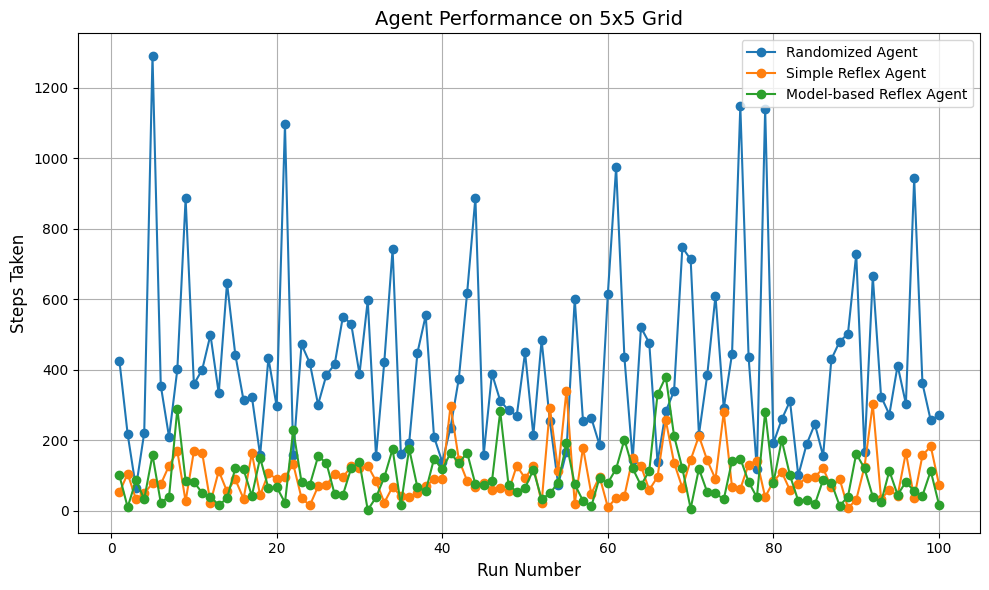

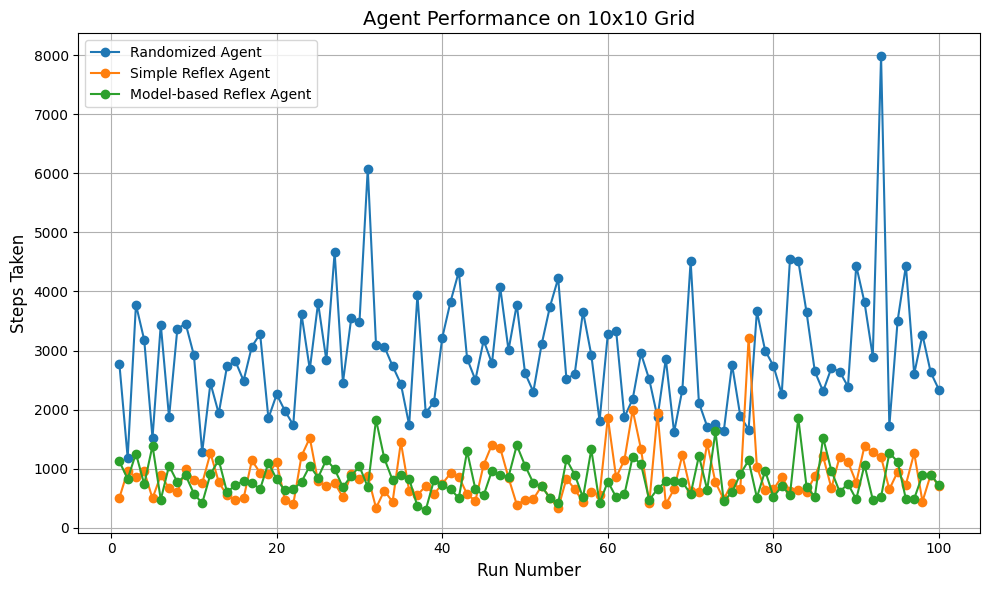

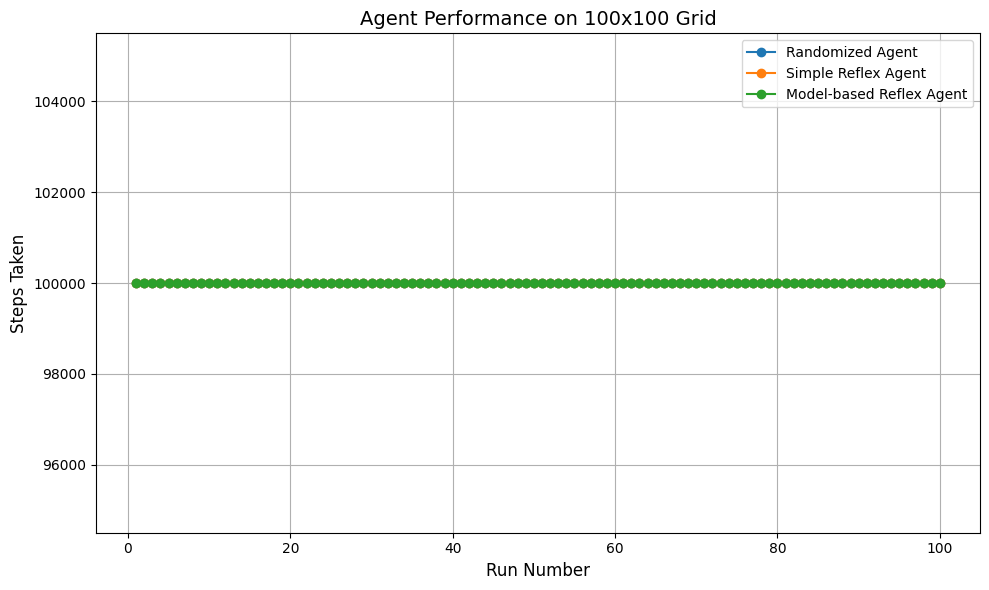

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Function to evaluate an agent on a given grid size and return steps for each run.
def evaluate_agent_per_run(agent, grid_size, dirt_prob=0.2, max_steps=100000, runs=100):
    steps_runs = []
    for _ in range(runs):
        steps, _ = vacuum_environment(agent, n=grid_size, dirt_prob=dirt_prob, max_steps=max_steps, verbose=False)
        steps_runs.append(steps)
    return steps_runs

grid_sizes = [5, 10, 100]

agents = {
     "Randomized Agent": simple_randomized_agent,
    "Simple Reflex Agent": simple_reflex_agent,
    "Model-based Reflex Agent": model_based_reflex_agent
}

results_by_grid = {}
runs = 100

for size in grid_sizes:
    results_by_grid[size] = {}
    for agent_name, agent_func in agents.items():
        results_by_grid[size][agent_name] = evaluate_agent_per_run(agent_func, size, runs=runs)

summary_table = {"Grid Size": grid_sizes}
for agent_name in agents.keys():
    summary_table[agent_name] = [np.mean(results_by_grid[size][agent_name]) for size in grid_sizes]
df = pd.DataFrame(summary_table)
print("Summary (Average Steps Taken):")
print(df)

for size in grid_sizes:
    plt.figure(figsize=(10, 6))
    for agent_name, run_results in results_by_grid[size].items():
        plt.plot(range(1, runs+1), run_results, marker='o', label=agent_name)
    plt.title(f"Agent Performance on {size}x{size} Grid", fontsize=14)
    plt.xlabel("Run Number", fontsize=12)
    plt.ylabel("Steps Taken", fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Fill out the following table with the average performance measure for 100 random runs (you may also create this table with code):

| Size     | Randomized Agent | Simple Reflex Agent | Model-based Reflex Agent |
|----------|------------------|---------------------|--------------------------|
| 5x5     | | | |
| 10x10   | | | |
| 100x100 | | | |

Add charts to compare the performance of the different agents.

# Agent Comparison Overview

## 1. Randomized Agent
- **Expectation:**  
  This agent is expected to perform poorly and require the highest number of steps.
- **Rationale:**  
  Since its actions are chosen entirely at random, the agent does not utilize environmental feedback. As a result, it frequently retraces its steps and repeatedly collides with obstacles, leading to inefficient performance.

## 2. Simple Reflex Agent
- **Expectation:**  
  This agent should outperform the randomized agent and complete the task in fewer steps.
- **Rationale:**  
  By basing its decisions on immediate percepts from the environment, the simple reflex agent makes more informed choices. Although it does not use any memory of past actions, its ability to react to current sensor input allows it to avoid some unnecessary moves.

## 3. Model-Based Reflex Agent
- **Expectation:**  
  This agent is anticipated to deliver even better performance than the simple reflex agent, taking the fewest steps overall.
- **Rationale:**  
  In addition to processing current percepts, the model-based reflex agent maintains an internal state. This memory enables it to avoid repeating previous mistakes, thereby improving its navigation efficiency and reducing redundant movements.


## Task 5: Robustness of the agent implementations [10 Points]

Describe how **your agent implementations** will perform

* if it is put into a rectangular room with unknown size,
* if the cleaning area can have an irregular shape (e.g., a hallway connecting two rooms), or
* if the room contains obstacles (i.e., squares that it cannot pass through and trigger the bumper sensors).
* if the dirt sensor is not perfect and gives 10% of the time a wrong reading (clean when it is dirty or dirty when it is clean).
* if the bumper sensor is not perfect and 10% of the time does not report a wall when there is one.

# Considerations for Different Environments

## 1. Rectangular Room with Unknown Size
- **Expectation:**  
  The agent should perform similarly in a rectangular room of unknown size.
- **Reasoning:**  
  The bumper sensors are designed to detect obstacles (i.e., walls). Therefore, even in a rectangular space, these sensors can determine where the room’s boundaries lie, and the agent can adjust its movements accordingly.

## 2. Irregularly Shaped Cleaning Areas (e.g., Hallways Connecting Two Rooms)
- **Expectation:**  
  The agent may not cover the entire area.
- **Reasoning:**  
  In irregularly shaped areas, such as hallways or rooms with non-standard geometries, some portions might be left unvisited. As a result, certain areas of dirt could remain uncleaned.

## 3. Rooms with Obstacles
- **Expectation:**  
  The current agent logic might not handle obstacles well.
- **Reasoning:**  
  If the room contains obstacles (cells that the agent cannot pass through and that trigger bumper sensors), the agent lacks the advanced logic to navigate around them. Consequently, dirt located behind or around obstacles might be missed.

## 4. Imperfect Dirt Sensor (10% Error Rate)
- **Expectation:**  
  The agent will operate as programmed, but some dirt might be missed.
- **Reasoning:**  
  If the dirt sensor gives an incorrect reading 10% of the time (indicating a clean cell when it’s dirty, or vice versa), then despite the agent following its programmed routine, some dirty spots might not be cleaned due to sensor inaccuracies.

## 5. Imperfect Bumper Sensor (10% Failure to Detect Walls)
- **Expectation:**  
  The agent’s navigation could be adversely affected.
- **Reasoning:**  
  If the bumper sensor fails to report a wall 10% of the time, the agent might not detect obstacles accurately. This can lead to the agent bumping into walls or obstacles, which in turn wastes energy and may result in dirt being overlooked.


## Advanced task: Imperfect Dirt Sensor

* __Graduate students__ need to complete this task [10 points]
* __Undergraduate students__ can attempt this as a bonus task [max +5 bonus points].

1. Change your simulation environment to run experiments for the following problem: The dirt sensor has a 10% chance of giving the wrong reading. Perform experiments to observe how this changes the performance of the three implementations. Your model-based reflex agent is likely not able to clean the whole room, so you need to measure performance differently as a tradeoff between energy cost and number of uncleaned squares.

2. Design an implement a solution for your model-based agent that will clean better. Show the improvement with experiments.

In [97]:
import random
import numpy as np
import matplotlib.pyplot as plt

def create_environment(n, dirt_prob):
    environment = [[False for _ in range(n)] for _ in range(n)]
    num_dirty_squares = int(n * n * dirt_prob)
    dirty_count = 0

    for y in range(n):
        for x in range(n):
            if dirty_count < num_dirty_squares and random.random() < dirt_prob:
                environment[y][x] = True
                dirty_count += 1
    return environment

def get_bumpers(x, y, n):
    return {
        "north": y == 0,
        "south": y == n - 1,
        "west":  x == 0,
        "east":  x == n - 1
    }

def display_environment(environment, agent_pos):
    n = len(environment)
    for y in range(n):
        row_str = ""
        for x in range(n):
            if (x, y) == agent_pos:
                row_str += "A "  # Agent's position
            elif environment[y][x]:
                row_str += "D "  # Dirty cell
            else:
                row_str += "C "  # Clean cell
        print(row_str)
    print()

def get_dirt_reading(x, y, environment, sensor_error_rate=0.1):
    true_value = environment[y][x]
    if random.random() < sensor_error_rate:
        return not true_value
    return true_value

def new_vacuum_environment(agent_function, n=5, dirt_prob=0.2, max_steps=100, sensor_error_rate=0.1, verbose=True):
    global position

    environment = create_environment(n, dirt_prob)
    total_dirt = sum(1 for row in environment for cell in row if cell)

    x = random.randint(0, n - 1)
    y = random.randint(0, n - 1)
    position = (x, y)
    steps = 0

    if verbose:
        print("Initial Environment:")
        display_environment(environment, position)

    while total_dirt > 0 and steps < max_steps:
        bumpers = get_bumpers(x, y, n)
        # Use the noisy sensor reading for dirt.
        noisy_dirt = get_dirt_reading(x, y, environment, sensor_error_rate)
        action = agent_function(bumpers, noisy_dirt)

        if verbose:
            print(f"Step {steps}: Position ({x}, {y}), Action: {action}")

        if action == "suck" and environment[y][x]:
            environment[y][x] = False
            total_dirt -= 1
        elif action == "north" and not bumpers["north"]:
            y -= 1  # Moving north decrements y
        elif action == "south" and not bumpers["south"]:
            y += 1  # Moving south increments y
        elif action == "west" and not bumpers["west"]:
            x -= 1  # Moving west decrements x
        elif action == "east" and not bumpers["east"]:
            x += 1  # Moving east increments x

        position = (x, y)
        steps += 1

        if verbose:
            display_environment(environment, position)

    if verbose:
        print("Final Environment:")
        display_environment(environment, position)
        print(f"Total steps taken: {steps}")
        print(f"Total dirt remaining: {total_dirt}")

    return steps, total_dirt


In [98]:
def run_experiment(agent_function, n_experiments=50, n=5, dirt_prob=0.2, max_steps=100, sensor_error_rate=0.1):
    """
    Run multiple simulation episodes for the given agent_function.
    Returns the average energy cost (steps) and average number of uncleaned squares.
    """
    results = []
    for _ in range(n_experiments):
        steps, remaining = new_vacuum_environment(agent_function, n, dirt_prob, max_steps, sensor_error_rate, verbose=False)
        results.append((steps, remaining))
    avg_steps = sum(res[0] for res in results) / len(results)
    avg_remaining = sum(res[1] for res in results) / len(results)
    return avg_steps, avg_remaining

Model-Based Reflex Agent -> Avg Steps: 77.66, Avg Uncleaned Squares: 0.66
Simple Reflex Agent -> Avg Steps: 79.59, Avg Uncleaned Squares: 0.70
Random Agent -> Avg Steps: 98.87, Avg Uncleaned Squares: 2.63


<ipython-input-103-2c1972c87d3f>:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(agent_names, rotation=45, ha="right")
<ipython-input-103-2c1972c87d3f>:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(agent_names, rotation=45, ha="right")


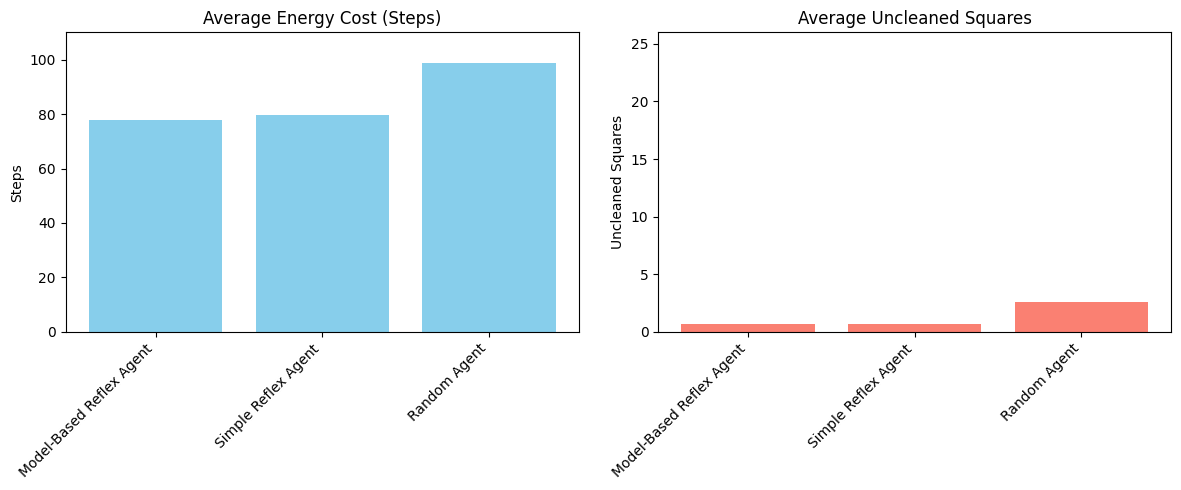

In [103]:
# Experiment parameters.
grid_size = 5
dirt_probability = 0.2
max_steps = 100
sensor_error_rate = 0.1  # 10% error in the dirt sensor.
n_experiments = 100

agents = {
    "Model-Based Reflex Agent": model_based_reflex_agent,
    "Simple Reflex Agent": simple_reflex_agent,
    "Random Agent": simple_randomized_agent
}

# Run experiments for each agent and collect the results.
results = {}
for name, agent_func in agents.items():
    avg_steps, avg_remaining = run_experiment(
        agent_func,
        n_experiments=n_experiments,
        n=grid_size,
        dirt_prob=dirt_probability,
        max_steps=max_steps,
        sensor_error_rate=sensor_error_rate
    )
    results[name] = (avg_steps, avg_remaining)
    print(f"{name} -> Avg Steps: {avg_steps:.2f}, Avg Uncleaned Squares: {avg_remaining:.2f}")

agent_names = list(results.keys())
avg_steps_list = [results[name][0] for name in agent_names]
avg_uncleaned_list = [results[name][1] for name in agent_names]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.bar(agent_names, avg_steps_list, color='skyblue')
ax1.set_title("Average Energy Cost (Steps)")
ax1.set_ylabel("Steps")
ax1.set_ylim(0, max_steps + 10)
ax1.set_xticklabels(agent_names, rotation=45, ha="right")

ax2.bar(agent_names, avg_uncleaned_list, color='salmon')
ax2.set_title("Average Uncleaned Squares")
ax2.set_ylabel("Uncleaned Squares")
ax2.set_ylim(0, grid_size * grid_size + 1)
ax2.set_xticklabels(agent_names, rotation=45, ha="right")

plt.tight_layout()
plt.show()


In [104]:
def improved_model_based_reflex_agent(bumpers, dirty):
    """
    Improved Agent (No Search):
      - If dirty, suck.
      - Otherwise, consider the four adjacent cells and their visit counts.
      - If any legal neighbor has not been visited, choose one of those at random.
      - Otherwise, choose the move leading to the cell with the lowest visit count.
    """
    global position, visit_count
    x, y = position
    if dirty:
        return "suck"

    directions = {
        "north": (0, -1),
        "south": (0, 1),
        "west": (-1, 0),
        "east": (1, 0)
    }

    legal_moves = []
    for move, (dx, dy) in directions.items():
        new_pos = (x + dx, y + dy)
        if not bumpers[move]:
            legal_moves.append((move, new_pos))

    if not legal_moves:
        return "stay"

    unvisited = [(move, pos) for (move, pos) in legal_moves if visit_count.get(pos, 0) == 0]
    if unvisited:
        chosen_move, chosen_pos = random.choice(unvisited)
    else:
        min_count = min(visit_count.get(pos, 0) for (move, pos) in legal_moves)
        candidates = [(move, pos) for (move, pos) in legal_moves if visit_count.get(pos, 0) == min_count]
        chosen_move, chosen_pos = random.choice(candidates)

    return chosen_move

Summary (Average Steps Taken):
   Grid Size  Model-based Reflex Agent  Improved Model-based Reflex Agent
0          5                    126.98                             116.76
1         10                    809.97                             786.75
2        100                   1000.00                            1000.00


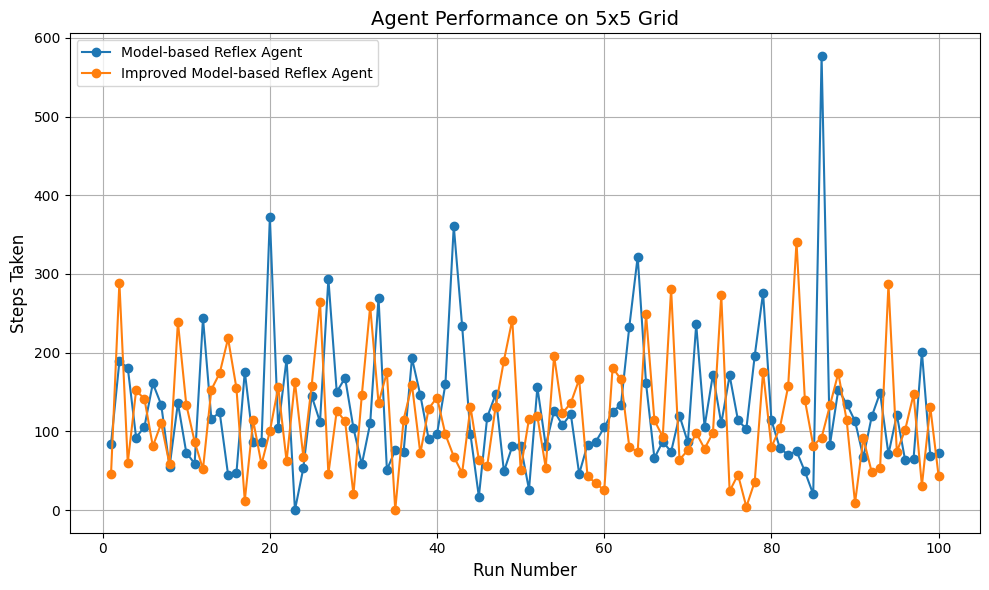

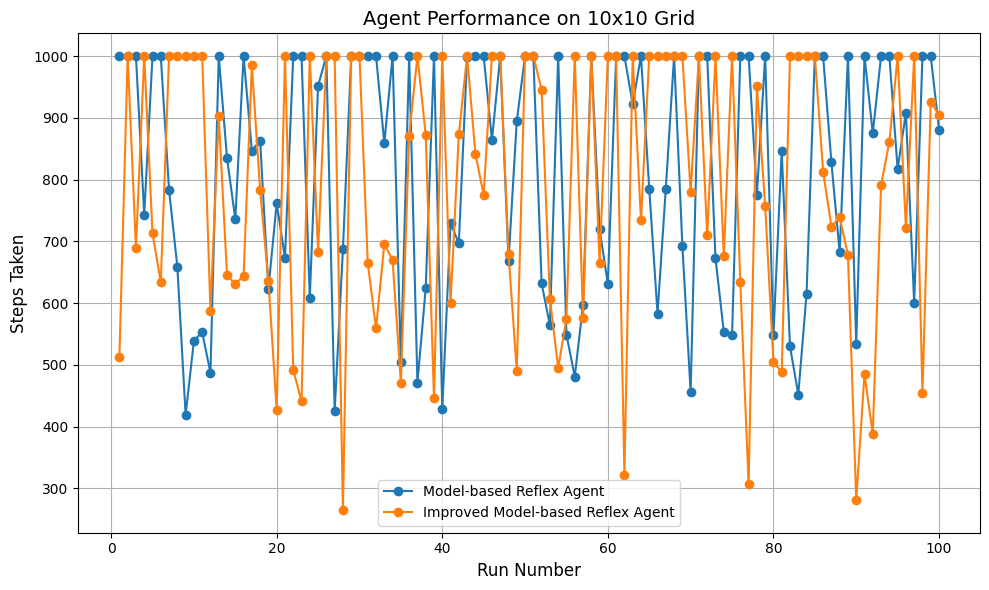

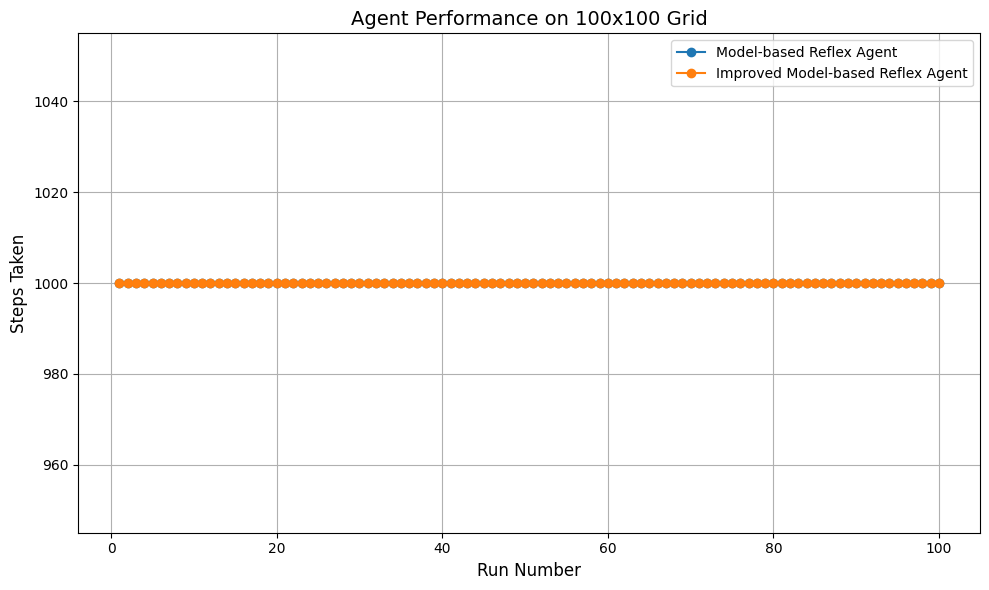

In [133]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Function to evaluate an agent on a given grid size and return steps for each run.
def evaluate_agent_per_run(agent, grid_size, dirt_prob=0.2, max_steps=1000, runs=100):
    steps_runs = []
    for _ in range(runs):
        # vacuum_environment is assumed to return a tuple: (steps, remaining_dirt)
        steps, _ = vacuum_environment(agent, n=grid_size, dirt_prob=dirt_prob, max_steps=max_steps, verbose=False)
        steps_runs.append(steps)
    return steps_runs

grid_sizes = [5, 10, 100]

agents = {
    "Model-based Reflex Agent": model_based_reflex_agent,
    "Improved Model-based Reflex Agent": improved_model_based_reflex_agent
}

results_by_grid = {}
runs = 100

for size in grid_sizes:
    results_by_grid[size] = {}
    for agent_name, agent_func in agents.items():
        results_by_grid[size][agent_name] = evaluate_agent_per_run(agent_func, size, runs=runs)

summary_table = {"Grid Size": grid_sizes}
for agent_name in agents.keys():
    summary_table[agent_name] = [np.mean(results_by_grid[size][agent_name]) for size in grid_sizes]
df = pd.DataFrame(summary_table)
print("Summary (Average Steps Taken):")
print(df)

for size in grid_sizes:
    plt.figure(figsize=(10, 6))
    for agent_name, run_results in results_by_grid[size].items():
        plt.plot(range(1, runs+1), run_results, marker='o', label=agent_name)
    plt.title(f"Agent Performance on {size}x{size} Grid", fontsize=14)
    plt.xlabel("Run Number", fontsize=12)
    plt.ylabel("Steps Taken", fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


## More advanced implementation tasks

* __Obstacles:__ Change your simulation environment to run experiments for the following problem: Add random obstacle squares that also trigger the bumper sensor. The agent does not know where the obstacles are. Perform experiments to observe how this changes the performance of the three implementations. Describe what would need to be done to perform better with obstacles. Add code if you can.

* __Agent for and environment with obstacles:__ Implement an agent for an environment where the agent does not know how large the environment is (we assume it is rectangular), where it starts or where the obstacles are. An option would be to always move to the closest unchecked/uncleaned square (note that this is actually depth-first search).

* __Utility-based agent:__ Change the environment for a $5 \times 5$ room, so each square has a fixed probability of getting dirty again. For the implementation, we give the environment a 2-dimensional array of probabilities. The utility of a state is defined as the number of currently clean squares in the room. Implement a utility-based agent that maximizes the expected utility over one full charge which lasts for 100000 time steps. To do this, the agent needs to learn the probabilities with which different squares get dirty again. This is very tricky!

In [ ]:
# Your ideas/code